# Analyzing the data and cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [3]:
data = pd.read_csv('./Liiklusõnnetused_2011_2021.csv')

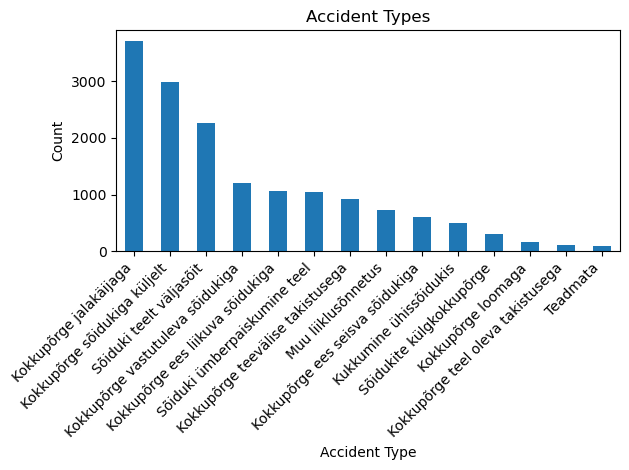

In [4]:
df = data


df['Liiklusõnnetuse liik [3]'].value_counts().plot(kind='bar')

plt.title('Accident Types')
plt.xlabel('Accident Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


plt.show()

In [5]:
#Cleaning data

#Generate descriptive statistics.

numerical_summary = data.describe()
pd.set_option('display.max_columns', None)
numerical_summary

,Isikuid,Hukkunuid,Vigastatuid,Sõidukeid,Kergliikurijuhi osalusel,Jalakäija osalusel,Kaassõitja osalusel,Maastikusõiduki juhi osalusel,Eaka (65+) mootorsõidukijuhi osalusel,Bussijuhi osalusel,Veoautojuhi osalusel,Ühissõidukijuhi osalusel,Sõiduautojuhi osalusel,Mootorratturi osalusel,Mopeedijuhi osalusel,Jalgratturi osalusel,Alaealise osalusel,Turvavarustust mitte kasutanud isiku osalusel,Esmase juhiloa omaniku osalusel,Mootorsõidukijuhi osalusel,Tüüpskeemi nr,Lubatud sõidukiirus (PPA),Tee nr (PPA),GPS X,GPS Y
count,15633.000000,15708.000000,15708.000000,15633.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15563.000000,15245.000000,15164.000000,4.749000e+03,1.346400e+04,1.345900e+04
mean,1.928037,0.048765,1.216387,1.497793,0.014265,0.245325,0.256506,0.006618,0.112639,0.055516,0.101716,0.065926,0.722162,0.066697,0.039131,0.151192,0.173874,0.119193,0.087965,0.883891,359.209052,60.680955,7.595548e+03,6.538844e+06,5.809568e+05
std,1.022584,0.235166,0.816581,0.764830,0.118583,0.430294,0.436718,0.081086,0.316161,0.228993,0.302284,0.248160,0.447948,0.249504,0.193913,0.358247,0.379013,0.324026,0.283253,0.320366,250.243224,21.988954,5.825822e+04,1.545420e+05,1.219702e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,101.000000,0.000000,1.000000e+00,6.516710e+05,3.690000e+05
25%,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,201.000000,50.000000,5.000000e+00,6.474984e+06,5.390980e+05
50%,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,206.000000,50.000000,4.700000e+01,6.581461e+06,5.470430e+05
75%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,502.000000,90.000000,1.410400e+04,6.588579e+06,6.381190e+05
max,24.000000,4.000000,23.000000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,999.000000,901.000000,2.921029e+06,6.635000e+06,6.472967e+06


In [6]:
# Checking data types and missing values

data_types_missing = pd.DataFrame({
    'Data Type': data.dtypes,
    'Missing Values': data.isnull().sum(),
    'Percentage Missing': (data.isnull().sum() / len(data)) * 100
})

 # Displaying the first 10 columns for data types and missing values info
data_types_missing

,Data Type,Missing Values,Percentage Missing
Juhtumi nr,object,0,0.000000
Toimumisaeg,object,0,0.000000
Isikuid,float64,75,0.477464
Hukkunuid,int64,0,0.000000
Vigastatuid,int64,0,0.000000
Sõidukeid,float64,75,0.477464
Aadress (PPA),object,1107,7.047364
Maja nr (PPA),object,9022,57.435702
Tänav (PPA),object,1696,10.797046
Ristuv tänav (PPA),object,12951,82.448434


In [7]:
#Dropping columns with too many missing values and columns which hold no significance.

too_much_missing=['Sõiduradade arv','Ristuv tänav (PPA)','Maja nr (PPA)','Sõiduradade arv','Tee km (PPA)','Tee nr (PPA)','Asustus (PPA)']
no_significance = ['Juhtumi nr','Aadress (PPA)']

data.drop(columns=too_much_missing, inplace=True)
data.drop(columns=no_significance, inplace=True)

In [8]:
# missing values in target variable

# Calculate the percentage of 'Teadmata' occurrences
teadmata_percentage = (data['Liiklusõnnetuse liik [1]'].eq('Teadmata').sum() / len(data)) * 100
print(f"The percentage of 'Teadmata' in Liiklusõnnetusetüüp [1] column: {teadmata_percentage:.2f}%\n")

teadmata_percentage = (data['Liiklusõnnetuse liik [3]'].eq('Teadmata').sum() / len(data)) * 100
print(f"The percentage of 'Teadmata' in Liiklusõnnetusetüüp [3] column: {teadmata_percentage:.2f}%\n")

data_with_teadmata_values=data.copy()

data = data[data['Liiklusõnnetuse liik [1]'] != 'Teadmata']
data = data[data['Liiklusõnnetuse liik [3]'] != 'Teadmata']
data = data.reset_index(drop=True)

The percentage of 'Teadmata' in Liiklusõnnetusetüüp [1] column: 0.56%

The percentage of 'Teadmata' in Liiklusõnnetusetüüp [3] column: 0.56%



In [9]:
#How does the transport authority categorize traffic incidents?

print("From 2011 - 2021, these were the different kinds of accident types logged by the Estonian Transport Authority\n")

for type, count in data['Tüüpskeem [2]'].value_counts().items():
    print(type, "(count: ", count, ")\n")

From 2011 - 2021, these were the different kinds of accident types logged by the Estonian Transport Authority

Sõiduk kaotab teelõigul või ristmikul juhitavuse ning kaldub kavandatud kursist paremale teelt välja või vastassuuna vööndisse. (count:  1584 )

Sõiduk kaotab teelõigul või ristmikul juhitavuse ning kaldub kavandatud kursist vasakule vastassuuna vööndisse või teelt välja. (count:  1215 )

Konflikt samas suunas otse sõitvate sõidukite vahel teelõigul või ristmiku peateel. (count:  1103 )

Ristmiku peateel otse sõitva sõiduki konflikt paremalt poolt kõrvalteelt tuleva sõidukiga. (count:  1036 )

Sõiduki konflikt teelõiku paremalt poolt ületava jalakäijaga. (count:  953 )

Sõiduk kaotab teelõigul või ristmikul juhitavuse ning paiskub ümber. (count:  929 )

Muu liikluskonflikt. (count:  872 )

Ristmiku peateel otse sõitva sõiduki konflikt vasakult poolt kõrvalteelt tuleva sõidukiga. (count:  800 )

Konflikt vastassuundadest otse sõitvate sõidukite vahel teelõigul või ristmiku peat

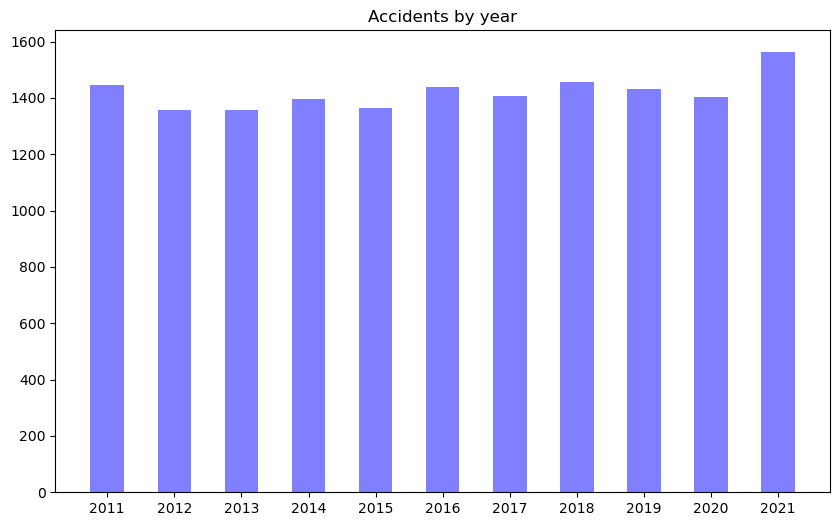

In [10]:
#Normalize dates
def parseTimes(row):
    if "/" in row:
        rowParts = row.split("/")
        if len(rowParts[0]) == 1:
            rowParts[0] = "0" + rowParts[0]
        if len(rowParts[1]) == 1:
            rowParts[1] = "0" + rowParts[1]

        return rowParts[0] + "." + rowParts[1] + "." + "20" + rowParts[2]
    else:
        return row

data['Toimumisaeg'] = data['Toimumisaeg'].apply(parseTimes)

def extract_year(string):
    year = string[-4:]
    if ':' in year:
        return string[6:10]
    return year

accident_years = data['Toimumisaeg'].apply(extract_year).value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(accident_years.index, accident_years.values, color='blue', alpha=0.5, width=0.5)
plt.title('Accidents by year')
plt.savefig('accidentsByYear.pdf')

# Traffic and Vehicle Statistics in Estonia (2011-2021)

The amount of registered cars in Estonia from 2011 to 2021 has grown significantly. 

- **Registered Cars in 2011:** `732,457`
- **Registered Cars in 2021:** `1,099,789`

Despite that the amount of traffic incidents reported has stayed consistent.


In [11]:
rows_before = len(data)

data = data.dropna()

rows_after = len(data)
print("Rows before dropping NaN values:", rows_before)
print("Rows after dropping NaN values:", rows_after)
print("Rows lost:", rows_before - rows_after)

# making a copy of the data so that changes in the model part of the project do not affect the outcomes in other parts
dfcopy=data.copy()


Rows before dropping NaN values: 15620
Rows after dropping NaN values: 11628
Rows lost: 3992


In [12]:
# further data cleaning 

#convert Valgustus [1],[2] into binary.

data['Valgustus [1]'] = data['Valgustus [1]'].replace({'Valge aeg': 1, 'Pimeda aeg': 0})
data['Valgustus [2]'] = data['Valgustus [2]'].replace({'Valge aeg': 1,'Pimeda ajal valgustus põleb': 1, 'Pimeda ajal valgustus ei põle': 0, 'Pimeda ajal valgustus puudub':0})

#turn floats into integers.

for column in data.select_dtypes(include=['float']).columns:
    data[column] = data[column].astype(int)

#asula into binary

data['Asula'] = data['Asula'].replace({'JAH': 1, 'EI': 0})


In [13]:
# one-hot encoding

columns_to_encode = ['Tänav (PPA)', 'Maakond (PPA)', 'Omavalitsus (PPA)','Tüüpskeem [2]', 'Tee tüüp [1]', 'Tee tüüp [2]','Tee element [1]', 'Tee element [2]', 'Tee objekt [2]', 'Kurvilisus','Tee tasasus', 'Tee seisund', 'Teekate', 'Teekatte seisund [2]', 'Ilmastik [1]', 'Valgustus [1]','Valgustus [2]']
data_encoded = pd.get_dummies(data, columns=columns_to_encode)

data_encoded['Asula'] = data_encoded['Asula'].replace({'JAH': 1, 'EI': 0})


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Select relevant columns
X = data[['Isikuid', 'Hukkunuid', 'Vigastatuid', 'Sõidukeid',
        'Asula', 'Kergliikurijuhi osalusel', 'Jalakäija osalusel', 'Kaassõitja osalusel',
       'Maastikusõiduki juhi osalusel',
       'Eaka (65+) mootorsõidukijuhi osalusel', 'Bussijuhi osalusel',
       'Veoautojuhi osalusel', 'Ühissõidukijuhi osalusel',
       'Sõiduautojuhi osalusel', 'Mootorratturi osalusel',
       'Mopeedijuhi osalusel', 'Jalgratturi osalusel', 'Alaealise osalusel',
       'Turvavarustust mitte kasutanud isiku osalusel',
       'Esmase juhiloa omaniku osalusel', 'Mootorsõidukijuhi osalusel', 'Valgustus [1]',
       'Valgustus [2]']]

y = data['Liiklusõnnetuse liik [1]']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9024075666380051
Classification Report:
                    precision    recall  f1-score   support

  Jalakäijaõnnetus       0.96      0.98      0.97      1138
        Kokkupõrge       0.91      0.95      0.93      1918
Muu liiklusõnnetus       0.71      0.34      0.46       363
 Ühesõidukiõnnetus       0.87      0.92      0.90      1233

          accuracy                           0.90      4652
         macro avg       0.86      0.80      0.81      4652
      weighted avg       0.89      0.90      0.89      4652



In [15]:
unique_data_types = data_encoded.dtypes.unique()
print(unique_data_types)

data_encoded = data_encoded.drop('Toimumisaeg', axis=1)
data_encoded = data_encoded.drop('Liiklusõnnetuse liik [3]', axis=1) # removing it because it is almost like target variable


[dtype('O') dtype('int32') dtype('int64') dtype('uint8')]


In [18]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix

X = data_encoded.drop(['Liiklusõnnetuse liik [1]'], axis=1)
y = data_encoded['Liiklusõnnetuse liik [1]']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

# RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=5)

# cross-validation
cv_scores = cross_val_score(rf_classifier, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=5), scoring='accuracy')

rf_classifier.fit(X_train, y_train)

# make predictions
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test Set Accuracy: {accuracy}')

print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean()}')

classification_rep = classification_report(y_test, y_pred)
print(f'Classification Report:\n{classification_rep}')

conf_matrix = confusion_matrix(y_test, y_pred)


Test Set Accuracy: 0.938950988822012
Cross-Validation Scores: [0.94196045 0.94153052 0.93895099 0.93806452 0.93505376]
Mean cross-validation accuracy: 0.9391120480034024
Classification Report:
                    precision    recall  f1-score   support

  Jalakäijaõnnetus       0.96      0.99      0.97       577
        Kokkupõrge       0.93      0.98      0.96       969
Muu liiklusõnnetus       0.87      0.46      0.60       187
 Ühesõidukiõnnetus       0.95      0.97      0.96       593

          accuracy                           0.94      2326
         macro avg       0.93      0.85      0.87      2326
      weighted avg       0.94      0.94      0.93      2326

Confusion Matrix:
[[571   4   2   0]
 [  6 954   4   5]
 [ 14  60  86  27]
 [  4   9   7 573]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=4)

# train the model
knn_classifier.fit(X_train, y_train)

# predictions on the test set
y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)


In [ ]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM classifier
svm_classifier = svm.SVC(kernel='rbf', C=1, gamma='scale')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'accuracy: {accuracy}')

class_report = classification_report(y_test, y_pred)
print('Classification report:\n', class_report)


# Visualizing accidents on a map and analyzing geographical features

In [ ]:
df = dfcopy

In [ ]:
# finding out which streets has the most accidents in each county
maakond_ja_tänav = df[['Maakond (PPA)','Tänav (PPA)']]
# making a dataframe whit columns 'Maakond (PPA)', 'Tänav (PPA)', and 'õnnetuste arv', where 'õnnetuste arv' represents the count of accidents for each street in each county
grouped = maakond_ja_tänav.groupby(['Maakond (PPA)', 'Tänav (PPA)']).size().reset_index(name='õnnetuste arv')
# creating a boolean mask where each True indicates that the corresponding row has the maximum number of accidents within its county
idx = grouped.groupby(['Maakond (PPA)'])['õnnetuste arv'].transform(max) == grouped['õnnetuste arv']
result = grouped[idx]
result

In [ ]:
folder_path = 'geop/'
shapefile_path = folder_path + 'ne_10m_admin_1_states_provinces.shp'

boundaries = gpd.read_file(shapefile_path)

estonia = boundaries[boundaries['admin'] == 'Estonia']

accidents_df = df

accidents_df['Liiklusõnnetuse liik [1]'] = accidents_df['Liiklusõnnetuse liik [1]'].replace({'Jalakäijaõnnetus': 'Pedestrian accident', 'Kokkupõrge': 'Collision', 'Muu liiklusõnnetus':'Other traffic incident', 'Ühesõidukiõnnetus':'One vehicle incident'})

X_column = 'GPS X'
Y_column = 'GPS Y'

# making points for the map using X and Y coordinates form the original data
geometry = [Point(xy) for xy in zip(accidents_df[Y_column], accidents_df[X_column])]
geo_df = gpd.GeoDataFrame(accidents_df,geometry=geometry)

# current crs of the geodataframe
geo_df.set_crs(epsg=3301, inplace=True)

# convert the geodataframe to the same crs as the boundaries
geo_df = geo_df.to_crs(epsg=4326)

# using only the points that fit inside the  boundaries of Estonis
geo_df_estonia = gpd.sjoin(geo_df, estonia, op='within')

# plotting
fig, ax = plt.subplots(figsize=(10, 10))
estonia.plot(ax=ax, color='white', edgecolor='black')
geo_df_estonia.plot(ax=ax, alpha=0.5, column='Liiklusõnnetuse liik [1]', legend=True, legend_kwds={'bbox_to_anchor': (1, 1)}, markersize=10,cmap='plasma')

plt.tight_layout()
plt.savefig('accidentsVisualized.pdf')
plt.title("Different types of traffic accidents in Estonia")
plt.show()


In [ ]:
# taking away "maakond" from the county names
geo_df['Maakond (PPA)'] = geo_df['Maakond (PPA)'].str.replace(' maakond', '')

kokku = geo_df['Maakond (PPA)'].value_counts()
#merging dataframes on index column of kokku and name column in estionia that contains county names
estonia = estonia.merge(kokku.rename('õnnetuste_arv'), left_on='name', right_index=True)


fig, ax = plt.subplots(figsize=(10, 10))

estonia.plot(column='õnnetuste_arv', ax=ax, legend=True, cmap='YlGnBu', edgecolor='black')
plt.title("Heatmap of traffic accidents in Estonia")
plt.axis('off')
plt.savefig('heatmap.pdf') 
plt.show()

In [ ]:
from matplotlib.colors import LinearSegmentedColormap, Normalize
import matplotlib.colors as mcolors
#light blue to dark blue
hex_colors = ['#ADD8E6', '#000080'] 

# convert hex to RGB
rgb_colors = [mcolors.hex2color(hex_color) for hex_color in hex_colors]

# setting up a map with custom colors
cmap = LinearSegmentedColormap.from_list('custom_blue', rgb_colors, N=100)
# using normalization to get a better result for the heatmap
norm = Normalize(vmin=estonia['õnnetuste_arv'].min(), vmax=estonia['õnnetuste_arv'].max())

fig, ax = plt.subplots(figsize=(10, 10))

estonia.plot(column='õnnetuste_arv', ax=ax, legend=True, cmap=cmap, norm=norm, edgecolor='black')
plt.title("Heatmap of traffic accidents in Estonia")
plt.axis('off')
plt.savefig('heatmapBlue.pdf') 
plt.show() 

In [ ]:
# making a heatmap using Folium 

# location coordinates are coordinates for Tartu
map_estonia = folium.Map(location=[58.3776, 26.7290], zoom_start=7)

# taking the latitude and longitude coordinates from the geodatarame and converting to a list
locations = geo_df_estonia.geometry.apply(lambda p: [p.y, p.x]).tolist()

HeatMap(locations).add_to(map_estonia)

map_estonia.save('heatmap.html')

In [ ]:
import plotnine as p9

# selecting the streets with most number of accidents in each county
selected_streets = ['Pärnu mnt', 'HELTERMAA - KÄRDLA - LUIDJA', 'TALLINN - NARVA',
       'TALLINN - TARTU - VÕRU - LUHAMAA',
       'TALLINN - TARTU - VÕRU - LUHAMAA', 'ÄÄSMÄE - HAAPSALU - ROHUKÜLA',
       'TALLINN - NARVA', 'TALLINN - PÄRNU - IKLA',
       'TARTU - RÄPINA - VÄRSKA', 'TALLINN - RAPLA - TÜRI',
       'RISTI - VIRTSU - KUIVASTU - KURESSAARE', 'Riia tn',
       'JÕHVI - TARTU - VALGA', 'TARTU - VILJANDI - KILINGI-NÕMME',
       'Jüri tn']

# filter the selected streets
selected_data = df[df['Tänav (PPA)'].isin(selected_streets)]


(
    p9.ggplot(
        data = selected_data, 
        mapping = p9.aes(x = 'Tänav (PPA)', fill = 'Ilmastik [1]')
    ) + 
    #a bar plot layer with 'position='fill'' to represent proportions
    p9.geom_bar(position = 'fill') +
    p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))+
    p9.theme(figure_size = (10, 10))+
    p9.ggtitle("Weather conditions on the streets with the most accidents in each county")
)




In [ ]:

selected_streets = ['Pärnu mnt', 'HELTERMAA - KÄRDLA - LUIDJA', 'TALLINN - NARVA',
       'TALLINN - TARTU - VÕRU - LUHAMAA',
       'TALLINN - TARTU - VÕRU - LUHAMAA', 'ÄÄSMÄE - HAAPSALU - ROHUKÜLA',
       'TALLINN - NARVA', 'TALLINN - PÄRNU - IKLA',
       'TARTU - RÄPINA - VÄRSKA', 'TALLINN - RAPLA - TÜRI',
       'RISTI - VIRTSU - KUIVASTU - KURESSAARE', 'Riia tn',
       'JÕHVI - TARTU - VALGA', 'TARTU - VILJANDI - KILINGI-NÕMME',
       'Jüri tn']

selected_data = df[df['Tänav (PPA)'].isin(selected_streets)]


(
    p9.ggplot(
        data = selected_data, 
        mapping = p9.aes(x = 'Tänav (PPA)', fill = 'Teekatte seisund [2]')
    ) + 
    p9.geom_bar(position = 'fill') +
    p9.scale_fill_brewer(type='qual', palette='Paired') +
    p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))+
    p9.theme(figure_size = (10, 10))  +
    p9.ggtitle("Condition of the road on the streets with the most accidents in each county")
    
    
)

In [ ]:
weather_lighting = data.groupby(['Ilmastik [1]', 'Valgustus [1]']).size().reset_index(name='counts')

weather_lighting['Valgustus [1]'] = weather_lighting['Valgustus [1]'].replace({1:'Light', 0:'Dark'})

pivot_data = weather_lighting.pivot(index='Ilmastik [1]', columns='Valgustus [1]', values='counts').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title("Accidents by Weather and Lighting Conditions")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.legend(title="Lighting Conditions")

plt.show()

In [ ]:
df.head()

# Exploring accidents across different demographic factors

In [ ]:

fatal_accident_count = (df['Hukkunuid'] != 0).sum()

accident_w_injuries_count = (df['Vigastatuid'] != 0).sum()
print(f"Number of accidents with fatalities: {fatal_accident_count}\n")
print(f"Number of accidents with injuries: {accident_w_injuries_count}\n")

fatal_accidents_no_safety_equipment = ((df['Turvavarustust mitte kasutanud isiku osalusel'] == 1) & (df['Hukkunuid'] != 0)).sum()

print(f"Number of fatal accidents where safety equipment was not used by at least one person: {fatal_accidents_no_safety_equipment}\n")

accident_w_injuries_no_safety_equipment = ((df['Turvavarustust mitte kasutanud isiku osalusel'] == 1) & (df['Vigastatuid'] != 0)).sum()

print(f"Number of accidents with injuries where safety equipment was not used by at least one person: {accident_w_injuries_no_safety_equipment}")

In [ ]:
df['Alaealise osalusel'] = df['Alaealise osalusel'].replace({1: 'Yes', 0: 'No'})


(
p9.ggplot(
    data = df, 
    mapping = p9.aes(x = 'Liiklusõnnetuse liik [1]', fill = 'Alaealise osalusel')
 )+ 
    p9.geom_bar(position = 'fill')+ p9.theme(axis_text_x = p9.element_text(angle = 90, hjust = 1))
)

In [ ]:
df = dfcopy

In [ ]:
# encoding data to find frequent patterns
too_much_missing=['GPS X','GPS Y','Toimumisaeg','Tüüpskeemi nr','Lubatud sõidukiirus (PPA)','Isikuid','Hukkunuid','Vigastatuid','Sõidukeid']
df.drop(columns=too_much_missing, inplace=True)
columns_to_encode = ['Liiklusõnnetuse liik [1]','Liiklusõnnetuse liik [3]','Tänav (PPA)', 'Maakond (PPA)', 'Omavalitsus (PPA)','Tüüpskeem [2]', 'Tee tüüp [1]', 'Tee tüüp [2]','Tee element [1]', 'Tee element [2]', 'Tee objekt [2]', 'Kurvilisus','Tee tasasus', 'Tee seisund', 'Teekate', 'Teekatte seisund [2]', 'Ilmastik [1]', 'Valgustus [1]','Valgustus [2]']
data_encoded = pd.get_dummies(df, columns=columns_to_encode)

data_encoded['Asula'] = data_encoded['Asula'].replace({'JAH': 1, 'EI': 0})




In [ ]:
data_encoded['Alaealise osalusel'] = data_encoded['Alaealise osalusel'].replace({'Yes': 1, 'No': 0})




In [ ]:
# using apriori algorithm
from mlxtend.frequent_patterns import apriori, association_rules
# minimum support threshold
min_support = 0.2

frequent_itemsets = apriori(data_encoded, min_support=min_support, use_colnames=True)
# minimum confidence threshold
min_confidence = 0.7
# association rules from frequent itemsets
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)


In [ ]:
print("Frequent Itemsets:")
# sorting the frequent itmesets and showing only sets with more than 1 element
sorted_frequent_itemsets = frequent_itemsets[frequent_itemsets['itemsets'].apply(len) > 1].sort_values(by='support', ascending=False)
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)  
sorted_frequent_itemsets

In [ ]:
print("Association Rules:")
rules